# Handwritten Digit Classification

In [1]:
# imports
import pandas as pd 
import numpy as np

In [2]:
df_train=pd.read_csv('./mnist_train.csv')
df_test=pd.read_csv('./mnist_test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [4]:
df_train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [5]:
# Split into features and labels of train dataset
x_train = df_train.drop('label', axis=1).values
y_train = df_train['label'].values


In [6]:
# Split into features and labels of test dataset
x_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values


In [7]:
from tensorflow.keras.utils import to_categorical


In [8]:
# Reshape and normalize of train dataset
x_train = x_train .reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train , num_classes=10)

In [9]:
# Reshape and normalize of test dataset
x_test = x_test .reshape(-1, 28, 28, 1) / 255.0
y_test = to_categorical(y_test , num_classes=10)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [12]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\AB\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
from EnergyEfficientAI import EnergyConsumptionDL


In [16]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.8949 - loss: 0.3364 - val_accuracy: 0.9851 - val_loss: 0.0493
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9868 - loss: 0.0432 - val_accuracy: 0.9867 - val_loss: 0.0433
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9836 - val_loss: 0.0488
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9903 - val_loss: 0.0330
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9951 - loss: 0.0147 - val_accuracy: 0.9912 - val_loss: 0.0349
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9911 - val_loss: 0.0377
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9905 - val_loss: 0.0407
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9969 -

In [17]:
predictions = model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


In [18]:
predicted_labels = np.argmax(predictions, axis=1)

# If you want to check the predictions for the first 5 samples:
for i in range(5):
    print(f"Predicted label: {predicted_labels[i]}, True label: {np.argmax(y_test[i])}")

Predicted label: 7, True label: 7
Predicted label: 3, True label: 3
Predicted label: 8, True label: 8
Predicted label: 9, True label: 9
Predicted label: 3, True label: 3


In [19]:
print("Done")

Done


## image test

In [20]:
from PIL import Image



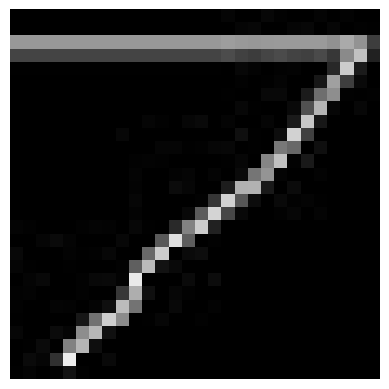

In [29]:
import matplotlib.pyplot as plt

# Load an image
img = Image.open("./dh.jpg")

# Display the image
plt.imshow(img)
plt.axis("off")  # Hide axes for better display
plt.show()

In [30]:
image_data = np.array(img).reshape(-1, 28, 28, 1) / 255.0  # normalize

In [31]:
prediction = model.predict(image_data)
predicted_label = int(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [32]:
print(f"Prediction:{predicted_label}")

Prediction:7


# model file

In [90]:
model.save("mnist_cnn_model2.h5")